In [115]:
import numpy as np
from IPython.display import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
Image(url='nba-karl-malone.gif')

In [116]:
player_totals=pd.read_csv('./data/Player Totals.csv')
player_season_info=pd.read_csv('./data/Player Season Info.csv')
player_career_info=pd.read_csv('./data/Player Career Info.csv')
player_award_shares=pd.read_csv('./data/Player Award Shares.csv')
all_star=pd.read_csv('./data/All-Star Selections.csv')
advanced=pd.read_csv('./data/Advanced.csv')
end_of_season=pd.read_csv('./data/End of Season Teams.csv')

hof=player_career_info.drop(['birth_year','num_seasons'],axis=1)
player_names_and_seasons=hof[['player','first_seas','last_seas','player_id']]

In [117]:
seasons = np.flip(player_totals.season.unique())
seasons_leaderboards = {}
for season in seasons:
    season_top10s = {'pts': player_totals[player_totals['season'] == season].sort_values(by=['pts']).tail(10),
                     'reb': player_totals[player_totals['season'] == season].sort_values(by=['trb']).tail(10),
                     'ast': player_totals[player_totals['season'] == season].sort_values(by=['ast']).tail(10),
                     'min': player_totals[player_totals['season'] == season].sort_values(by=['mp']).tail(10),
                     'stl': player_totals[player_totals['season'] == season].sort_values(by=['stl']).tail(10),
                     'blk': player_totals[player_totals['season'] == season].sort_values(by=['blk']).tail(10)}
    seasons_leaderboards[season] = season_top10s

In [4]:
leaderboard_points=[]
for i in range(len(player_names_and_seasons)):
    x=0
    if i%250==0:
        print(i)
    for season in range(player_names_and_seasons.iloc[i].first_seas,player_names_and_seasons.iloc[i].last_seas+1):
        top10_pts = seasons_leaderboards[season]['pts']
        top10_reb = seasons_leaderboards[season]['reb']
        top10_ast = seasons_leaderboards[season]['ast']
        top10_min = seasons_leaderboards[season]['min']
        top10_stl = seasons_leaderboards[season]['stl']
        top10_blk = seasons_leaderboards[season]['blk']
        for j in range(9,-1,-1):
            if top10_pts.iloc[j].player_id == player_names_and_seasons.iloc[i].player_id:
                x+=(5 + j/2)
            if top10_reb.iloc[j].player_id == player_names_and_seasons.iloc[i].player_id:
                x+=(5 + j/2)
            if top10_ast.iloc[j].player_id == player_names_and_seasons.iloc[i].player_id:
                x+=(5 + j/2)
            if top10_min.iloc[j].player_id == player_names_and_seasons.iloc[i].player_id:
                x+=(5 + j/2)
            if top10_stl.iloc[j].player_id == player_names_and_seasons.iloc[i].player_id:
                x+=(5 + j/2)
            if top10_blk.iloc[j].player_id == player_names_and_seasons.iloc[i].player_id:
                x+=(5 + j/2)
    leaderboard_points.append(x)
    
hof['Leaderboard points']=leaderboard_points        

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000


In [118]:
allstar=[]
for i in range(len(player_names_and_seasons)):
    x=0
    all_stars=all_star[all_star['player']==player_names_and_seasons.iloc[i].player]
    for j in range(len(all_stars)):
        if player_names_and_seasons.iloc[i].first_seas <= all_stars.iloc[j].season <= player_names_and_seasons.iloc[i].last_seas:
            x = x + 1
            
    allstar.append(x)

hof['All-Star appearances']=allstar        

In [119]:
clean=pd.read_csv('./data/NBA_players_clean.csv')
clean.columns

Index(['Player', 'From', 'To', 'Years', 'Pos', 'Ht', 'Height', 'Wt', 'G',
       'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 'eFG%', 'PER', 'WS',
       'All Star', 'All NBA', 'All ABA', 'All Rookie', 'All Defensive',
       'BLK Champ', 'STL Champ', 'TRB Champ', 'AST Champ', 'Scoring Champ',
       'Most Improved', 'Sixth Man', 'DPOY', 'ROY', 'AS MVP', 'CF MVP',
       'Finals MVP', 'MVP', 'Championships', 'NBA 75 Team',
       'ABA All-Time Team'],
      dtype='object')

In [120]:
clean['Player']

0             Alaa Abdelnaby
1            Zaid Abdul-Aziz
2       Kareem Abdul-Jabbar*
3         Mahmoud Abdul-Rauf
4          Tariq Abdul-Wahad
                ...         
5018              Ante Žižić
5019                Jim Zoet
5020               Bill Zopf
5021             Ivica Zubac
5022              Matt Zunic
Name: Player, Length: 5023, dtype: object

In [121]:
def cut_string(str):
    if '*' in str:
        return str.split('*')[0]
    else:
        return str
clean['player']=clean['Player'].apply(lambda x:cut_string(x))

In [122]:
clean['player']

0            Alaa Abdelnaby
1           Zaid Abdul-Aziz
2       Kareem Abdul-Jabbar
3        Mahmoud Abdul-Rauf
4         Tariq Abdul-Wahad
               ...         
5018             Ante Žižić
5019               Jim Zoet
5020              Bill Zopf
5021            Ivica Zubac
5022             Matt Zunic
Name: player, Length: 5023, dtype: object

In [123]:
rings_list=[]
for index, player in player_names_and_seasons.iterrows():
    x=0
    clean_players=clean[clean.player==player.player]
    for index2, clean_player in clean_players.iterrows():
        if clean_player.From == player.first_seas and clean_player.To <= player.last_seas:
            x = clean_player.Championships

    rings_list.append(x)    
            
hof['Championships']=rings_list     

In [124]:
best5WSAverage=[]
for i in player_names_and_seasons.player_id:
    best5WSAverage.append(advanced[advanced['player_id']==i].nlargest(5, 'ws')['ws'].mean())
hof['Average of 5 highest WS seasons']=best5WSAverage


In [125]:
best5BPMAverage=[]
for i in player_names_and_seasons.player_id:
    best5BPMAverage.append(advanced[advanced['player_id']==i].nlargest(5, 'bpm')['bpm'].mean())
hof['Average of 5 highest BPM seasons']=best5BPMAverage

In [126]:
best5VORPAverage=[]
for i in player_names_and_seasons.player_id:
    best5VORPAverage.append(advanced[advanced['player_id']==i].nlargest(5, 'vorp')['vorp'].mean())
hof['Average of 5 highest VORP seasons']=best5VORPAverage

In [14]:
heights=[]

for index, player in player_names_and_seasons.iterrows():
    x=clean.Height.mean()
    clean_players=clean[clean.player==player.player]
    for index2, clean_player in clean_players.iterrows():
        if clean_player.From == player.first_seas and clean_player.To <= player.last_seas:
            if not clean_player.Height.empty: 
                x = clean_player.Height
    
    heights.append(x)    
            
hof['Height']=heights


weights=[]

for index, player in player_names_and_seasons.iterrows():
    x=clean.Wt.mean()
    clean_players=clean[clean.player==player.player]
    for index2, clean_player in clean_players.iterrows():
        if clean_player.From == player.first_seas and clean_player.To <= player.last_seas:
            if not clean_player.Wt.empty: 
                x = clean_player.Wt
    
    weights.append(x)    
            
hof['Weight']=heights


AttributeError: 'float' object has no attribute 'empty'

In [15]:
hof.isna().sum()

player_id                               0
player                                  0
hof                                     0
first_seas                              0
last_seas                               0
Leaderboard points                      0
Championships                           0
Average of 5 highest BPM seasons     1199
Average of 5 highest VORP seasons    1199
dtype: int64

In [127]:
hof['hof'] = hof['hof'].astype(int)

In [128]:
hof['Average of 5 highest WS seasons'] = hof['Average of 5 highest WS seasons'].fillna(0)
hof['Average of 5 highest BPM seasons'] = hof['Average of 5 highest BPM seasons'].fillna(0)
hof['Average of 5 highest VORP seasons'] = hof['Average of 5 highest VORP seasons'].fillna(0)


In [129]:
hof[hof['player']=='Patrick Ewing']

,player_id,player,hof,first_seas,last_seas,All-Star appearances,Championships,Average of 5 highest WS seasons,Average of 5 highest BPM seasons,Average of 5 highest VORP seasons
2263,2264,Patrick Ewing,1,1986,2002,11,0,12.22,4.86,5.34
3966,3967,Patrick Ewing,0,2011,2011,0,0,-0.10,-9.10,0.00


In [ ]:
hof.drop(3966,inplace=True)

In [130]:
from sklearn.preprocessing import StandardScaler

young=hof[(hof['last_seas']>2014) & (hof['hof']==0)]
old=hof[hof['last_seas']<=2014]
X_a=old.drop(['first_seas','last_seas','hof','player','player_id'],axis=1)
y=old['hof']
X= StandardScaler().fit_transform(X_a)
X = pd.DataFrame(X, columns=X_a.columns, index=X_a.index)
X_pred_a=young.drop(['first_seas','last_seas','hof','player','player_id'],axis=1)
X_pred =StandardScaler().fit_transform(X_pred_a)
X_pred = pd.DataFrame(X_pred, columns=X_pred_a.columns, index=X_pred_a.index)
y_pred=young['hof']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
knn_prob=knn.predict_proba(X_pred)[:,-1]

logmodel=LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
pred_log=logmodel.predict(X_test)
log_prob=logmodel.predict_proba(X_pred)[:,-1]

rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)
rfc_prob=rfc.predict_proba(X_pred)[:,-1]


print('Logistic Regression')
print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))

print('Random Forest')
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))


print('K Nearest Neighbor')
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))




C:\Users\arxer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Logistic Regression
[[915   0]
 [ 12  20]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       915
           1       1.00      0.62      0.77        32

    accuracy                           0.99       947
   macro avg       0.99      0.81      0.88       947
weighted avg       0.99      0.99      0.99       947

Random Forest
[[912   3]
 [ 11  21]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       915
           1       0.88      0.66      0.75        32

    accuracy                           0.99       947
   macro avg       0.93      0.83      0.87       947
weighted avg       0.98      0.99      0.98       947

K Nearest Neighbor
[[902  13]
 [ 12  20]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       915
           1       0.61      0.62      0.62        32

    accuracy                           0.97       947
   mac

In [131]:
res=pd.concat([X_pred,y_pred],axis=1)

#res['log_pred']=pred_log
res['log_prob']=log_prob

#res['rfc_pred']=pred_rfc
res['rfc_prob']=rfc_prob

#res['knn_pred']=pred_knn
res['knn_prob']=knn_prob

res_final=pd.concat([res,hof['player']],axis=1).dropna()

In [132]:
final = res_final[['player','log_prob']]
final.sort_values(by=['log_prob'],ascending=False)

,player,log_prob
3462,LeBron James,1.000000
3769,Kevin Durant,0.999993
3902,Stephen Curry,0.999940
3584,Chris Paul,0.999864
3879,James Harden,0.998729
...,...,...
4608,Donte Grantham,0.000391
5050,Jacob Gilyard,0.000375
4895,Will Magnay,0.000356
4679,Tyler Davis,0.000330


In [133]:
pd.DataFrame(logmodel.coef_, columns=X_train.columns)

,All-Star appearances,Championships,Average of 5 highest WS seasons,Average of 5 highest BPM seasons,Average of 5 highest VORP seasons
0,1.239128,0.468021,0.679918,0.366232,-0.232961


In [113]:
logmodel.score(X_train,y_train)

0.9813248766737139

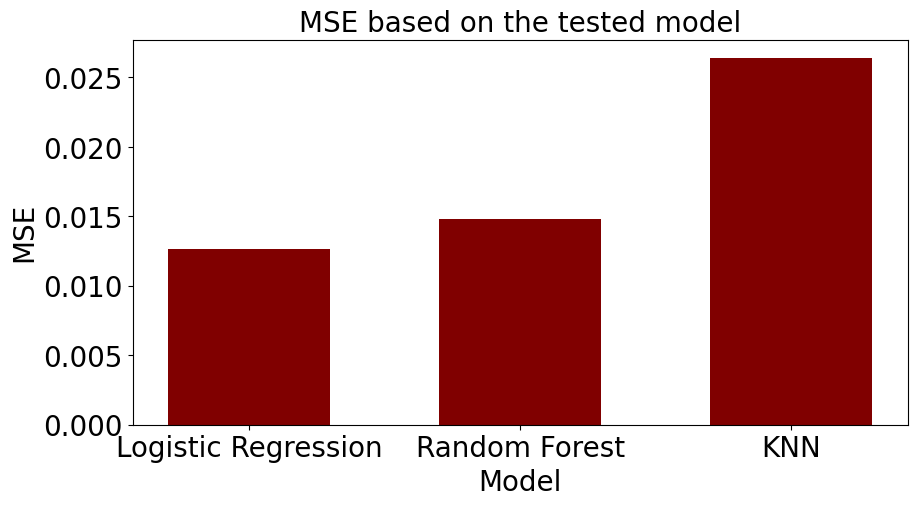

In [134]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
 
  
# creating the dataset
data = {'Logistic Regression':mean_squared_error(pred_log, y_test), 'Random Forest':mean_squared_error(pred_rfc, y_test), 
        'KNN':mean_squared_error(pred_knn, y_test)}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.6)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.xlabel("Model", fontsize= 20)
plt.ylabel("MSE", fontsize= 20)
plt.title("MSE based on the tested model", fontsize=20)
plt.show()